In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.optimize import minimize

In [2]:
data = pd.read_csv("E:/Projects/AGN_mass_project/data/shaw_2012.csv")
data = data.loc[:]
data

,Name,1FGL,z,f_z,F5980,alpha,L5100,LHb,WHb,MHb,L3000,LMgII,WMgII,MMgII,Tel,_RA,_DE
0,J0004-4736,J0004.7-4737,0.880,,11.4,-0.99,,,,,45.339,42.896,2700,7.85,NTT,1.14867,-47.60517
1,J0008+1450,J0008.3+1452,0.045,,73.8,-1.79,43.216,40.921,10800,8.19,,,,,SDSS,2.02345,14.83982
2,J0017-0512,J0017.4-0510,0.226,,30.4,-0.46,44.353,42.388,2300,7.55,,,,,HET,4.39925,-5.21158
3,J0024+0349,J0024.6+0346,0.545,,27.1,-1.88,,,,,45.11,42.585,3000,7.76,WMKO,6.18841,3.81766
4,J0043+3426,J0043.6+3424,0.966,,6.6,-1.24,,,,,45.201,42.807,3400,8.01,WMKO,10.95352,34.44059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,J2315-5018,J2315.9-5014,0.808,,18.9,-1.19,,,,,45.457,42.415,3100,7.68,VLT,348.93458,-50.31108
105,J2325-4051,J2325.8-4043,0.325,,3.9,-2.34,,,,,,,,,VLT,351.26409,-40.85835
106,J2331-2148,J2331.0-2145,0.563,,12.4,-1.01,44.88,42.471,2100,7.53,44.911,42.548,2600,7.63,WMKO,352.76679,-21.80428
107,J2334+0736,J2334.3+0735,0.401,,99.6,-0.36,45.399,43.53,3000,8.37,,,,,HET,353.55342,7.60764


Mass Estimation using MgII

In [3]:
MgII_alpha_beta_list = [(1.70,0.63,'S11'),                        # First tuple= By Shen 2011 (S11)
                        (0.505,0.62,'MD04'),                      # second tuple= By Mclure Dunlop (MD04)
                        (0.86,0.5,'VO09'),                        # Third tuple= By Vestergaard & Osmer 2009 (VO09)
                        (0.74,0.62,'S10')]                       # Fourth tuple= By Yue Shen (S10)
                                                           

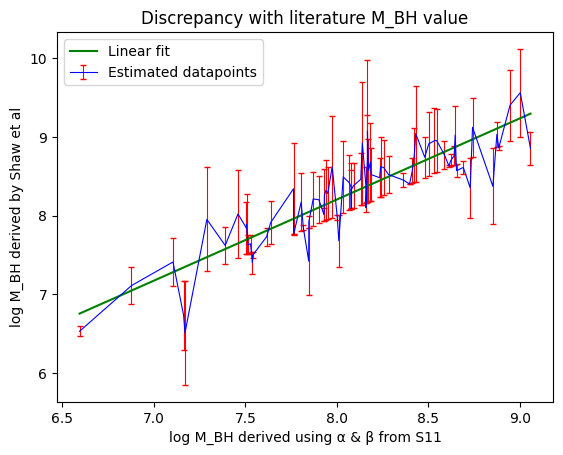

    This_work  Shaw_2012  Difference
13   6.593442       6.53    0.063442
41   6.877133       7.11    0.232867
72   7.104089       7.41    0.305911
94   7.162332       6.73    0.432332
20   7.169673       6.51    0.659673
..        ...        ...         ...
85   8.874846       9.03    0.155154
88   8.885298       8.86    0.025298
73   8.946643       9.40    0.453357
29   9.002747       9.56    0.557253
52   9.058649       8.85    0.208649

[74 rows x 3 columns]
Mean relative error in predictions: 0.2988716290039108


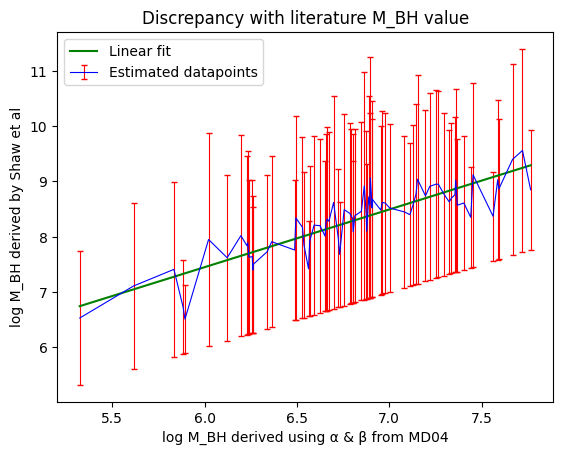

    This_work  Shaw_2012  Difference
13   5.323282       6.53    1.206718
41   5.615103       7.11    1.494897
72   5.833539       7.41    1.576461
94   5.883142       6.73    0.846858
20   5.893443       6.51    0.616557
..        ...        ...         ...
85   7.587296       9.03    1.442704
88   7.593118       8.86    1.266882
73   7.667943       9.40    1.732057
29   7.721497       9.56    1.838503
52   7.765609       8.85    1.084391

[74 rows x 3 columns]
Mean relative error in predictions: 1.4847806773897398


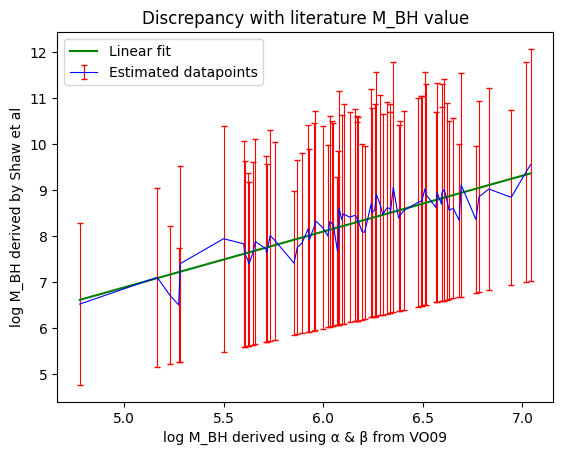

    This_work  Shaw_2012  Difference
13   4.776362       6.53    1.753638
41   5.165743       7.11    1.944257
94   5.227862       6.73    1.502138
20   5.273683       6.51    1.236317
72   5.281939       7.41    2.128061
..        ...        ...         ...
88   6.781958       8.86    2.078042
85   6.831696       9.03    2.198304
52   6.944129       8.85    1.905871
73   7.018543       9.40    2.381457
29   7.041497       9.56    2.518503

[74 rows x 3 columns]
Mean relative error in predictions: 2.139142839551902


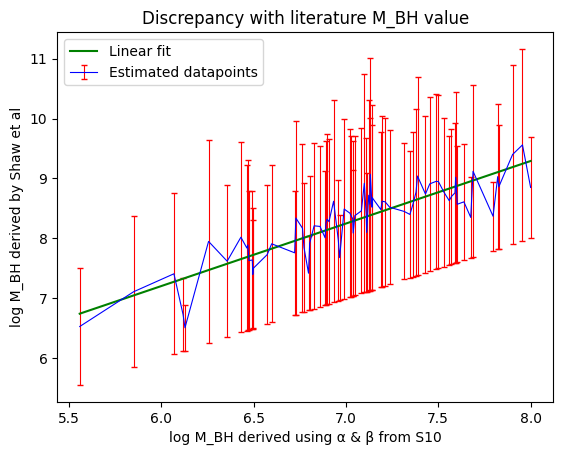

    This_work  Shaw_2012  Difference
13   5.558282       6.53    0.971718
41   5.850103       7.11    1.259897
72   6.068539       7.41    1.341461
94   6.118142       6.73    0.611858
20   6.128443       6.51    0.381557
..        ...        ...         ...
85   7.822296       9.03    1.207704
88   7.828118       8.86    1.031882
73   7.902943       9.40    1.497057
29   7.956497       9.56    1.603503
52   8.000609       8.85    0.849391

[74 rows x 3 columns]
Mean relative error in predictions: 1.2497806773897397
Optimal alpha and beta values are: [2.3790709 0.573722 ]


In [4]:
for i in range(len(MgII_alpha_beta_list)):
    alpha= MgII_alpha_beta_list[i][0]
    beta= MgII_alpha_beta_list[i][1]
    alpha_beta_taken_from = MgII_alpha_beta_list[i][2]
    gamma = 2
    df = pd.DataFrame({'L': data['L3000'], 'FWHM': data['WMgII']})   # Here L3000 column is actually Log λLλ at 3000 Å, and WMgII column is the FWHM (full width at half maximum)



    df['L'] = pd.to_numeric(df['L'], errors='coerce')
    df['FWHM'] = pd.to_numeric(df['FWHM'], errors='coerce')
    df = df.dropna(subset=['L', 'FWHM'])
    L = 7+ df['L']   # this 7 is added as the values in data are given in the units 10^-7 W, so we want to convert it into erg/s. So we need to multiply by 10^7, but since this value is going to be used as a power, we add 7 instead of multiplying.
    FWHM = df['FWHM']


    def log_M_BH(alpha,beta,gamma,L,FWHM):      
        return alpha + np.log10(10**L/1e44)*beta + np.log10(FWHM/1000)*gamma    # As L values were originally in log, we took antilog here by doing 10^L

 
    log_M_BH_array = np.zeros(len(L))
    for index,value in enumerate(log_M_BH(alpha,beta,gamma,L,FWHM)):
        log_M_BH_array[index]= value


    plot_df = pd.DataFrame({'This_work': log_M_BH_array, 'Shaw_2012': data['MMgII'][df.index].astype(float)})   # Here We make sure masses predicted by us and Shaw are aligned for each object by index selection.
    plot_df = plot_df.sort_values(['This_work', 'Shaw_2012'], ascending=[True, True])
    y_err = abs(plot_df['Shaw_2012']-plot_df['This_work'])

    result = stats.linregress(plot_df['This_work'],plot_df['Shaw_2012'])


    plt.xlabel(f'log M_BH derived using α & β from {alpha_beta_taken_from}')
    plt.ylabel('log M_BH derived by Shaw et al')
    plt.title('Discrepancy with literature M_BH value')
    plt.errorbar(x=plot_df['This_work'], y=plot_df['Shaw_2012'], yerr=y_err,color='blue', ecolor='red',lw=0.8,capsize=2,label='Estimated datapoints')
    plt.plot(plot_df['This_work'], result.intercept + result.slope* plot_df['This_work'], color='green',label= 'Linear fit')
    plt.legend()
    plt.show()


    # Optimization
    observed_values = plot_df['Shaw_2012'] 
    def error(params):
        alpha, beta = params
        calculated_values = alpha + np.log10((10**L / 1e44)) * beta + np.log10(FWHM / 1000) * gamma

        return np.sum((sorted(calculated_values)-observed_values)**2)

    initial_guess = [0.5, 0.5]
    optimized_alpha_beta = minimize(error, initial_guess, method='Nelder-Mead')



    plot_df['Difference'] = y_err  # New column showing difference in observed and expected values
    table_df = plot_df[['This_work', 'Shaw_2012','Difference']]
    print(table_df)
    print('Mean relative error in predictions: '+str(np.mean(plot_df['Difference'])))

print("Optimal alpha and beta values are:", optimized_alpha_beta.x) 

OPTIMIZATION FIT

Hence, we now have obtained the optimal alpha and beta values. Now we plug in these values and form a new linear fit model to observe the minimization of error.

In [5]:
alpha= optimized_alpha_beta.x[0]     # We will now fit the model with these optimal values of alpha and beta we got above
beta= optimized_alpha_beta.x[1]      
print(alpha,beta)

2.379070902694512 0.573722004866918


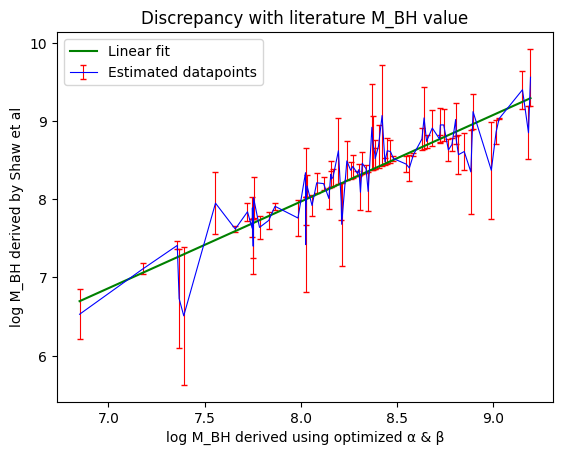

    M_BH using optimized parameters  Shaw_2012  Difference
13                         6.849528       6.53    0.319528
41                         7.178972       7.11    0.068972
72                         7.357979       7.41    0.052021
94                         7.367599       6.73    0.637599
20                         7.391597       6.51    0.881597
..                              ...        ...         ...
88                         9.017459       8.86    0.157459
85                         9.033064       9.03    0.003064
73                         9.154668       9.40    0.245332
52                         9.185971       8.85    0.335971
29                         9.196420       9.56    0.363580

[74 rows x 3 columns]
Mean error in predictions after using optimized alpha and beta: 0.22051718425617842


In [6]:
gamma = 2
df = pd.DataFrame({'L': data['L3000'], 'FWHM': data['WMgII']})  


df['L'] = pd.to_numeric(df['L'], errors='coerce')
df['FWHM'] = pd.to_numeric(df['FWHM'], errors='coerce')
df = df.dropna(subset=['L', 'FWHM'])
L = 7+ df['L']   
FWHM = df['FWHM']


def log_M_BH(alpha,beta,gamma,L,FWHM):      
    return alpha + np.log10(10**L/1e44)*beta + np.log10(FWHM/1000)*gamma   


log_M_BH_array = np.zeros(len(L))
for index,value in enumerate(log_M_BH(alpha,beta,gamma,L,FWHM)):
    log_M_BH_array[index]= value


plot_df = pd.DataFrame({'M_BH using optimized parameters': log_M_BH_array, 'Shaw_2012': data['MMgII'][df.index].astype(float)})  # changed plot_df first column name everywhere
plot_df = plot_df.sort_values(['M_BH using optimized parameters', 'Shaw_2012'], ascending=[True, True])
y_err = abs(plot_df['Shaw_2012']-plot_df['M_BH using optimized parameters'])

result = stats.linregress(plot_df['M_BH using optimized parameters'],plot_df['Shaw_2012'])


plt.xlabel(f'log M_BH derived using optimized α & β')     # changed xlabel
plt.ylabel('log M_BH derived by Shaw et al')
plt.title('Discrepancy with literature M_BH value')
plt.errorbar(x=plot_df['M_BH using optimized parameters'], y=plot_df['Shaw_2012'], yerr=y_err,color='blue', ecolor='red',lw=0.8,capsize=2,label='Estimated datapoints')
plt.plot(plot_df['M_BH using optimized parameters'], result.intercept + result.slope* plot_df['M_BH using optimized parameters'], color='green',label= 'Linear fit')
plt.legend()
plt.show()


plot_df['Difference'] = y_err  
table_df = plot_df[['M_BH using optimized parameters', 'Shaw_2012','Difference']]
print(table_df)
print('Mean error in predictions after using optimized alpha and beta: '+str(np.mean(plot_df['Difference'])))